In [ ]:
# we will study the hyperparamter tuning of fully connected scatternet

# first find optimal number of layers and neuron numbers
# second optimize the batch size and number of epochs for the best learned architecture


### Loading the dataset here

In [9]:
import numpy as np

import h5py
from sklearn.model_selection import train_test_split

#now load this dataset 
h5f = h5py.File('./datasets/s8_sio2tio2_v2.h5','r')
X = h5f['sizes'][:]
Y = h5f['spectrum'][:]

#get the ranges of the loaded data
num_layers = X.shape[1]
num_lpoints = Y.shape[1]
size_max = np.amax(X)
size_min = np.amin(X)
size_av = 0.5*(size_max + size_min)

#this information is not given in the dataset
lam_min = 300
lam_max = 1200
lams = np.linspace(lam_min, lam_max, num_lpoints)

#create a train - test split of the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.55, random_state=42)

# normalize inputs 
x_train = (x_train - 50)/20 
x_test = (x_test - 50)/20 

print("Dataset has been loaded")
print("x-train", x_train.shape)
print("x-test ", x_test.shape)
print("y-train", y_train.shape)
print("y-test ", y_test.shape)

Dataset has been loaded
x-train (44999, 8)
x-test  (55001, 8)
y-train (44999, 256)
y-test  (55001, 256)


### create models here

In [17]:
import scnets as scn
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#define and visualize the model here
#model = scn.fullycon(num_layers, num_lpoints, 4, 500, 2)

model = scn.convprel(in_size=8, 
        out_size=256,
        c1_nf=64,
        clayers=3,
        ker_size=3)
model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))


AttributeError: module 'scnets' has no attribute 'convprel'

In [ ]:
x_t, x_v, y_t, y_v = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
history = model.fit(x_t, y_t,
                    batch_size=64,
                    epochs=250, 
                    verbose=0,
                    validation_data=(x_v, y_v))


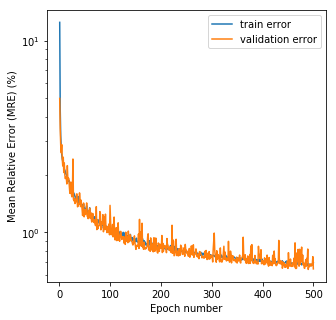

In [4]:
scn.plot_training_history(history, 64*2.56)

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import scnets as scn
#model = KerasClassifier(build_fn=scn.fullycon, in_size=8, out_size=250, N_gpus=1, epochs=500, verbose=0)

model = KerasClassifier(build_fn=scn.conv1dmodel, 
                        in_size=8, 
                        out_size=256, 
                        c1_nf=64,
                        clayers=3,
                        ker_size=3,
                        epochs=250, 
                        verbose=0)

param_grid = dict(c1_nf=[32, 64, 96], 
                  clayers=[1,2,3,4], 
                  ker_size=[3,5,7], 
                  batch_size=[32,64])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=1)
grid_result = grid.fit(x_train, y_train)




Fitting 3 folds for each of 72 candidates, totalling 216 fits


/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:89: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/keras/backend/mxnet_backend.py:92: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use th

In [15]:
grid_result.best_params_

{'batch_size': 64, 'c1_nf': 32, 'clayers': 2, 'ker_size': 5}

In [14]:
grid_result.cv_results_

/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/hegder/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/

{'mean_fit_time': array([ 440.59602499,  481.73871398,  477.10135643,  504.1547633 ,
         488.27373465,  564.76856009,  571.80046884,  569.00620119,
         650.78964178,  740.00103672,  597.98015889,  659.03726633,
         476.14166268,  508.75317804,  505.10563159,  556.87875859,
         556.58007542,  542.48226706,  591.323385  ,  616.57070398,
         658.64879243,  891.65342418, 1055.23733377,  993.75831501,
         647.80959813,  629.8490928 ,  516.74331371,  787.65950712,
         635.2311732 ,  545.72071338,  904.7078863 ,  685.55618747,
         530.5135781 ,  815.14902997,  821.7310555 ,  685.34639025,
         240.90511258,  246.83409182,  259.09067996,  262.85167106,
         228.2099692 ,  392.25437156,  374.78024157,  452.21288816,
         459.90044618,  495.74129097,  501.12204981,  368.91637723,
         240.11106253,  237.93171946,  261.74841015,  265.67413298,
         274.72749496,  378.51081745,  436.21683431,  241.44164371,
         274.60629002,  330.472

'mean_fit_time': array([ 440.59602499,  481.73871398,  477.10135643,  504.1547633 ,
         488.27373465,  564.76856009,  571.80046884,  569.00620119,
         650.78964178,  740.00103672,  597.98015889,  659.03726633,
         476.14166268,  508.75317804,  505.10563159,  556.87875859,
         556.58007542,  542.48226706,  591.323385  ,  616.57070398,
         658.64879243,  891.65342418, 1055.23733377,  993.75831501,
         647.80959813,  629.8490928 ,  516.74331371,  787.65950712,
         635.2311732 ,  545.72071338,  904.7078863 ,  685.55618747,
         530.5135781 ,  815.14902997,  821.7310555 ,  685.34639025,
         240.90511258,  246.83409182,  259.09067996,  262.85167106,
         228.2099692 ,  392.25437156,  374.78024157,  452.21288816,
         459.90044618,  495.74129097,  501.12204981,  368.91637723,
         240.11106253,  237.93171946,  261.74841015,  265.67413298,
         274.72749496,  378.51081745,  436.21683431,  241.44164371,
         274.60629002,  330.47249166,  394.98302094,  318.71901139,
         237.12692181,  248.02535923,  254.61501988,  243.65626915,
         298.34629599,  273.75161084,  318.28928526,  312.33878072,
         309.61013468,  335.33733678,  316.16733519,  284.3205506 ]),
 'std_fit_time': array([ 16.87972466,   7.92785374,   5.77026847,  46.09935758,
         54.51365785,   4.27852784,  94.58970885,  62.52370001,
          8.4561614 ,   2.7468705 , 145.0622183 ,  99.96551438,
          5.17816229,  12.67787649,  23.55063229,   9.66484519,
         36.6158132 ,  34.19875912, 100.63498294,  97.25506357,
          8.78125165,  87.44096196,  58.64011269,  34.89501886,
         34.69794873,   6.55967573,  16.17142818,  23.55024969,
         52.92218389,  50.06045253,  25.01777585,  18.80812352,
         81.798268  ,   2.03161994,  42.98112108, 110.64334738,
          9.66915548,   0.84179362,   6.43580261,  14.37030668,
         10.02095687,  28.2914121 , 100.27866673,   4.12918697,
          4.19608165,  48.65261655,  25.96345247,  61.99284042,
          4.68735307,  10.21360139,   9.8859609 ,  20.70074481,
         20.51026577,  56.21085735,  55.81395671,   8.02054713,
         50.9381089 ,  50.45400177,  22.28014196,  67.88824331,
          5.44755769,  11.84267318,   5.09502951,  13.30998334,
         10.04504684,  34.3255134 ,   0.83824628,  33.02031315,
         44.69969273,  41.65936289,  50.8080964 ,  36.12854555]),
 'mean_score_time': array([1.48248084, 1.61645206, 1.52614307, 1.50255108, 1.5502789 ,
        1.57044665, 1.6061248 , 1.58751472, 1.59509166, 1.68163586,
        1.79815904, 1.7393082 , 1.47499736, 1.52648115, 1.5446895 ,
        1.50675567, 1.54464761, 1.62923439, 1.55051088, 1.56298979,
        1.7317764 , 1.75597771, 1.8009282 , 1.95601543, 1.52369038,
        1.48506896, 1.56178371, 1.53837752, 1.58946848, 1.53822851,
        1.67706863, 1.74836882, 1.67516692, 1.74954589, 1.6798114 ,
        1.72637788, 0.76347407, 0.68936872, 0.79896879, 0.85983062,
        0.81541355, 0.84865721, 0.83474739, 0.88329641, 0.89842264,
        0.93576241, 0.91452034, 0.85306342, 0.77134498, 0.7801017 ,
        0.85619156, 0.82537786, 0.82716012, 0.88619153, 0.92515985,
        0.85173941, 0.8888003 , 0.89410488, 0.86849999, 0.88820569,
        0.73052979, 0.86012634, 0.82792679, 0.85549124, 0.85315657,
        0.82530626, 0.88788549, 0.90339359, 0.88132191, 0.8901968 ,
        0.94266113, 0.90914003]),
 'std_score_time': array([0.0809353 , 0.0434697 , 0.06246195, 0.05935619, 0.00983632,
        0.10535178, 0.13783207, 0.08746206, 0.05477639, 0.03246781,
        0.05349619, 0.13466161, 0.14158229, 0.07571865, 0.08168413,
        0.05528071, 0.06024407, 0.02103915, 0.07350117, 0.1008799 ,
        0.04944533, 0.08355515, 0.09599189, 0.11462328, 0.02945484,
        0.01043705, 0.0536539 , 0.0657963 , 0.07744391, 0.04640753,
        0.03043051, 0.07704773, 0.05899877, 0.07714815, 0.06984614,
        0.08692043, 0.05506912, 0.07381311, 0.03992863, 0.05990567,
        0.05875238, 0.04115549, 0.03138722, 0.02226701, 0.01140741,
        0.01028036, 0.04148711, 0.01940906, 0.03398852, 0.04651999,
        0.03599124, 0.06798827, 0.05388377, 0.02796698, 0.0052635 ,
        0.0512727 , 0.0245259 , 0.06295023, 0.02127435, 0.05833234,
        0.05479642, 0.0411167 , 0.0659268 , 0.04616794, 0.06244371,
        0.02330616, 0.02381002, 0.03937768, 0.10743165, 0.04943378,
        0.0353715 , 0.05471914]),
 'param_batch_size': masked_array(data=[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
                    32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
                    32, 32, 32, 32, 32, 32, 32, 32, 64, 64, 64, 64, 64, 64,
                    64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
                    64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
                    64, 64],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_c1_nf': masked_array(data=[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 64, 64,
                    64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 96, 96, 96, 96,
                    96, 96, 96, 96, 96, 96, 96, 96, 32, 32, 32, 32, 32, 32,
                    32, 32, 32, 32, 32, 32, 64, 64, 64, 64, 64, 64, 64, 64,
                    64, 64, 64, 64, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
                    96, 96],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_clayers': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2,
                    3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4,
                    1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2,
                    3, 3, 3, 4, 4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_ker_size': masked_array(data=[3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7,
                    3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7,
                    3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7,
                    3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7, 3, 5, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 32, 'c1_nf': 32, 'clayers': 1, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 1, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 1, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 2, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 2, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 2, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 3, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 3, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 3, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 4, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 4, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 32, 'clayers': 4, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 1, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 1, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 1, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 2, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 2, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 2, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 3, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 3, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 3, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 4, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 4, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 64, 'clayers': 4, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 1, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 1, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 1, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 2, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 2, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 2, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 3, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 3, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 3, 'ker_size': 7},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 4, 'ker_size': 3},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 4, 'ker_size': 5},
  {'batch_size': 32, 'c1_nf': 96, 'clayers': 4, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 1, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 1, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 1, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 2, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 2, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 2, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 3, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 3, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 3, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 4, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 4, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 32, 'clayers': 4, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 1, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 1, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 1, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 2, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 2, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 2, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 3, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 3, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 3, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 4, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 4, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 64, 'clayers': 4, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 1, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 1, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 1, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 2, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 2, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 2, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 3, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 3, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 3, 'ker_size': 7},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 4, 'ker_size': 3},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 4, 'ker_size': 5},
  {'batch_size': 64, 'c1_nf': 96, 'clayers': 4, 'ker_size': 7}],
 'split0_test_score': array([0.00166667, 0.0016    , 0.00193333, 0.00266667, 0.00186667,
        0.00206667, 0.00246667, 0.00293333, 0.00273333, 0.00286667,
        0.00213333, 0.00253333, 0.00173333, 0.00193333, 0.0028    ,
        0.0026    , 0.00193333, 0.00193333, 0.00226667, 0.00233333,
        0.00246667, 0.0024    , 0.00253333, 0.00233333, 0.0022    ,
        0.00186667, 0.0022    , 0.002     , 0.00186667, 0.00226667,
        0.002     , 0.00193333, 0.00213333, 0.0022    , 0.00213333,
        0.0022    , 0.00173333, 0.002     , 0.0014    , 0.002     ,
        0.00253333, 0.00233333, 0.00206667, 0.00246667, 0.002     ,
        0.00193333, 0.00266667, 0.0024    , 0.0016    , 0.00213333,
        0.00186667, 0.0024    , 0.00213333, 0.0024    , 0.00253333,
        0.00226667, 0.0024    , 0.00186667, 0.0022    , 0.0024    ,
        0.00153333, 0.002     , 0.0024    , 0.002     , 0.0016    ,
        0.00186667, 0.00253333, 0.00246667, 0.0022    , 0.00233333,
        0.00193333, 0.0016    ]),
 'split1_test_score': array([0.0024    , 0.00193333, 0.0012    , 0.00213333, 0.00206667,
        0.00246667, 0.00193333, 0.00253333, 0.00233333, 0.00173333,
        0.00246667, 0.0018    , 0.0018    , 0.00166667, 0.002     ,
        0.00186667, 0.00193333, 0.00193333, 0.0024    , 0.00173333,
        0.00173333, 0.002     , 0.00186667, 0.0024    , 0.00126667,
        0.0022    , 0.00206667, 0.00153333, 0.00206667, 0.00233333,
        0.00213333, 0.002     , 0.00226667, 0.00173333, 0.0018    ,
        0.00213333, 0.00153333, 0.0016    , 0.00186667, 0.001     ,
        0.00233333, 0.0018    , 0.0024    , 0.00213333, 0.00206667,
        0.0026    , 0.00226667, 0.00213333, 0.00193333, 0.00146667,
        0.0018    , 0.00213333, 0.002     , 0.00193333, 0.0018    ,
        0.00166667, 0.002     , 0.00186667, 0.00166667, 0.002     ,
        0.00233333, 0.00226667, 0.00186667, 0.0018    , 0.0016    ,
        0.00206667, 0.00193333, 0.00213333, 0.00186667, 0.00233333,
        0.00246667, 0.00226667]),
 'split2_test_score': array([0.0030002 , 0.00173345, 0.00260017, 0.00286686, 0.00293353,
        0.00246683, 0.00280019, 0.00233349, 0.00280019, 0.0020668 ,
        0.0020668 , 0.00273352, 0.00220015, 0.00286686, 0.00246683,
        0.0020668 , 0.00266684, 0.00313354, 0.00226682, 0.00200013,
        0.00200013, 0.00313354, 0.00273352, 0.00286686, 0.00246683,
        0.00260017, 0.00233349, 0.00233349, 0.00233349, 0.00260017,
        0.00246683, 0.00220015, 0.00226682, 0.00293353, 0.0030002 ,
        0.00306687, 0.00273352, 0.00186679, 0.00166678, 0.00293353,
        0.00306687, 0.00213348, 0.00220015, 0.00286686, 0.00246683,
        0.00173345, 0.00266684, 0.00280019, 0.00260017, 0.0020668 ,
        0.00226682, 0.00246683, 0.00280019, 0.00260017, 0.00266684,
        0.0025335 , 0.0025335 , 0.00273352, 0.00273352, 0.00260017,
        0.00260017, 0.00233349, 0.00326688, 0.00193346, 0.00273352,
        0.0025335 , 0.00226682, 0.00233349, 0.00280019, 0.00193346,
        0.00266684, 0.00246683]),
 'mean_test_score': array([0.00235561, 0.00175559, 0.00191115, 0.00255561, 0.00228894,
        0.00233339, 0.00240005, 0.00260006, 0.00262228, 0.00222227,
        0.00222227, 0.00235561, 0.00191115, 0.0021556 , 0.00242228,
        0.00217783, 0.00217783, 0.00233339, 0.00231116, 0.00202227,
        0.00206671, 0.00251117, 0.00237783, 0.00253339, 0.00197782,
        0.00222227, 0.00220005, 0.0019556 , 0.00208894, 0.00240005,
        0.00220005, 0.00204449, 0.00222227, 0.00228894, 0.00231116,
        0.00246672, 0.00200004, 0.00182226, 0.00164448, 0.00197782,
        0.0026445 , 0.00208894, 0.00222227, 0.00248894, 0.00217783,
        0.00208894, 0.00253339, 0.0024445 , 0.00204449, 0.00188893,
        0.00197782, 0.00233339, 0.00231116, 0.00231116, 0.00233339,
        0.0021556 , 0.00231116, 0.0021556 , 0.00220005, 0.00233339,
        0.0021556 , 0.00220005, 0.00251117, 0.00191115, 0.00197782,
        0.0021556 , 0.00224449, 0.00231116, 0.00228894, 0.00220005,
        0.00235561, 0.00211116]),
 'std_test_score': array([5.45313915e-04, 1.36982222e-04, 5.71830319e-04, 3.09583745e-04,
        4.63034070e-04, 1.88601629e-04, 3.57010463e-04, 2.49388000e-04,
        2.06134688e-04, 4.75566024e-04, 1.74937538e-04, 4.01290372e-04,
        2.06146739e-04, 5.14564491e-04, 3.28118192e-04, 3.09506255e-04,
        3.45776617e-04, 5.65777616e-04, 6.28186970e-05, 2.45451156e-04,
        3.03064138e-04, 4.69393085e-04, 3.70577110e-04, 2.37355340e-04,
        5.14534288e-04, 2.99865023e-04, 1.08929121e-04, 3.28165699e-04,
        1.91227745e-04, 1.44095217e-04, 1.96333991e-04, 1.13377551e-04,
        6.28899342e-05, 4.93994775e-04, 5.05855189e-04, 4.25227642e-04,
        5.25013167e-04, 1.66308696e-04, 1.91169192e-04, 7.89511257e-04,
        3.09609747e-04, 2.20000709e-04, 1.36980546e-04, 2.99872491e-04,
        2.06155046e-04, 3.70481852e-04, 1.88604774e-04, 2.74052629e-04,
        4.15813294e-04, 2.99823569e-04, 2.06148816e-04, 1.44067451e-04,
        3.50039135e-04, 2.79388549e-04, 3.81084580e-04, 3.62491814e-04,
        2.26678399e-04, 4.08631950e-04, 4.35536821e-04, 2.49505205e-04,
        4.53303035e-04, 1.44064707e-04, 5.77012935e-04, 8.31603039e-05,
        5.34338425e-04, 2.79402571e-04, 2.45459743e-04, 1.36996891e-04,
        3.86260180e-04, 1.88498951e-04, 3.09579276e-04, 3.70571422e-04]),
 'rank_test_score': array([16, 71, 66,  4, 30, 19, 13,  3,  2, 34, 34, 16, 66, 47, 12, 44, 44,
        19, 24, 59, 56,  7, 15,  5, 61, 34, 39, 65, 53, 13, 39, 57, 34, 30,
        24, 10, 60, 70, 72, 61,  1, 53, 34,  9, 44, 53,  5, 11, 57, 69, 61,
        19, 24, 24, 19, 47, 24, 47, 39, 19, 47, 39,  7, 66, 61, 47, 33, 24,
        30, 39, 16, 52], dtype=int32),
 'split0_train_score': array([0.00173339, 0.00160005, 0.00190006, 0.00283343, 0.00240008,
        0.00223341, 0.00243341, 0.00280009, 0.00240008, 0.00306677,
        0.00183339, 0.00263342, 0.00190006, 0.00200007, 0.00243341,
        0.00223341, 0.00220007, 0.00223341, 0.00210007, 0.00236675,
        0.00236675, 0.00223341, 0.00226674, 0.00230008, 0.00200007,
        0.00220007, 0.00226674, 0.00196673, 0.00293343, 0.00216674,
        0.00233341, 0.00206674, 0.00233341, 0.00216674, 0.00220007,
        0.00250008, 0.0019334 , 0.00186673, 0.00123337, 0.0020334 ,
        0.00183339, 0.00170006, 0.00233341, 0.0020334 , 0.00196673,
        0.00226674, 0.00243341, 0.00223341, 0.00163339, 0.00226674,
        0.00183339, 0.00236675, 0.0021334 , 0.00240008, 0.00240008,
        0.00220007, 0.00233341, 0.00233341, 0.00220007, 0.00240008,
        0.00176673, 0.00200007, 0.00226674, 0.00236675, 0.00210007,
        0.0020334 , 0.00233341, 0.00256675, 0.00210007, 0.00223341,
        0.00246675, 0.00223341]),
 'split1_train_score': array([0.00283343, 0.00220007, 0.00186673, 0.00186673, 0.00196673,
        0.00246675, 0.00173339, 0.00220007, 0.00220007, 0.00226674,
        0.00246675, 0.00250008, 0.00233341, 0.00230008, 0.00250008,
        0.00256675, 0.00250008, 0.00253342, 0.00230008, 0.00250008,
        0.00206674, 0.00243341, 0.00260009, 0.00246675, 0.0020334 ,
        0.00196673, 0.00256675, 0.00220007, 0.00250008, 0.0021334 ,
        0.00256675, 0.00223341, 0.00210007, 0.00226674, 0.00266676,
        0.00250008, 0.00183339, 0.00206674, 0.00180006, 0.00216674,
        0.00176673, 0.00220007, 0.00220007, 0.00233341, 0.00186673,
        0.00333344, 0.00210007, 0.00260009, 0.00216674, 0.00220007,
        0.00206674, 0.0030001 , 0.00243341, 0.00226674, 0.00216674,
        0.0021334 , 0.00223341, 0.00250008, 0.00240008, 0.0031001 ,
        0.00226674, 0.00220007, 0.00250008, 0.00280009, 0.00186673,
        0.00210007, 0.00273342, 0.00260009, 0.00250008, 0.00253342,
        0.00246675, 0.00243341]),
 'split2_train_score': array([0.00236667, 0.00183333, 0.0018    , 0.00223333, 0.0023    ,
        0.00183333, 0.0027    , 0.0021    , 0.00236667, 0.00223333,
        0.0021    , 0.0021    , 0.0022    , 0.00183333, 0.00213333,
        0.00136667, 0.00183333, 0.0024    , 0.002     , 0.00203333,
        0.00203333, 0.00236667, 0.0023    , 0.00233333, 0.00206667,
        0.0021    , 0.00213333, 0.00193333, 0.00233333, 0.0022    ,
        0.00173333, 0.00223333, 0.00233333, 0.0023    , 0.00253333,
        0.0022    , 0.00186667, 0.00156667, 0.00156667, 0.0025    ,
        0.002     , 0.00223333, 0.00203333, 0.00246667, 0.00226667,
        0.00213333, 0.00253333, 0.0022    , 0.0022    , 0.00183333,
        0.00223333, 0.00206667, 0.00243333, 0.00223333, 0.00213333,
        0.00233333, 0.0023    , 0.0022    , 0.00226667, 0.00196667,
        0.00163333, 0.00213333, 0.00223333, 0.00193333, 0.00243333,
        0.002     , 0.0024    , 0.002     , 0.0024    , 0.00216667,
        0.0021    , 0.00256667]),
 'mean_train_score': array([0.00231116, 0.00187782, 0.0018556 , 0.00231116, 0.00222227,
        0.00217783, 0.00228894, 0.00236672, 0.00232227, 0.00252228,
        0.00213338, 0.00241117, 0.00214449, 0.00204449, 0.00235561,
        0.00205561, 0.00217783, 0.00238894, 0.00213338, 0.00230005,
        0.0021556 , 0.0023445 , 0.00238894, 0.00236672, 0.00203338,
        0.00208894, 0.00232228, 0.00203338, 0.00258895, 0.00216671,
        0.00221117, 0.00217783, 0.0022556 , 0.00224449, 0.00246672,
        0.00240006, 0.00187782, 0.00183338, 0.00153337, 0.00223338,
        0.00186671, 0.00204449, 0.00218894, 0.00227783, 0.00203338,
        0.00257784, 0.00235561, 0.0023445 , 0.00200004, 0.00210005,
        0.00204449, 0.00247784, 0.00233338, 0.00230005, 0.00223338,
        0.00222227, 0.00228894, 0.0023445 , 0.00228894, 0.00248895,
        0.00188893, 0.00211116, 0.00233339, 0.00236672, 0.00213338,
        0.00204449, 0.00248895, 0.00238895, 0.00233338, 0.00231116,
        0.0023445 , 0.00241116]),
 'std_train_score': array([4.50799849e-04, 2.46968686e-04, 4.16020849e-05, 3.98471929e-04,
        1.85254694e-04, 2.61560043e-04, 4.07626363e-04, 3.09151051e-04,
        8.74785407e-05, 3.85252248e-04, 2.59641018e-04, 2.26662677e-04,
        1.81215288e-04, 1.93119234e-04, 1.59512793e-04, 5.05806729e-04,
        2.72653585e-04, 1.22727916e-04, 1.24749829e-04, 1.96298593e-04,
        1.49920505e-04, 8.31436934e-05, 1.49917239e-04, 7.20226404e-05,
        2.71893401e-05, 9.55818711e-05, 1.81247488e-04, 1.18656268e-04,
        2.52919225e-04, 2.71875262e-05, 3.51050561e-04, 7.85524977e-05,
        1.09979726e-04, 5.66326068e-05, 1.96258337e-04, 1.41460641e-04,
        4.15809102e-05, 2.05509908e-04, 2.32543586e-04, 1.96230151e-04,
        9.81037528e-05, 2.43927789e-04, 1.22758962e-04, 1.81194212e-04,
        1.69938407e-04, 5.37061786e-04, 1.85238410e-04, 1.81242266e-04,
        2.59619191e-04, 1.90550733e-04, 1.64030487e-04, 3.89084822e-04,
        1.41406956e-04, 7.20336100e-05, 1.18658142e-04, 8.31160684e-05,
        4.15685417e-05, 1.22759097e-04, 8.31574522e-05, 4.66971147e-04,
        2.72644860e-04, 8.31443848e-05, 1.18659079e-04, 3.53853290e-04,
        2.32511198e-04, 4.15991192e-05, 1.74997336e-04, 2.75363049e-04,
        1.69962527e-04, 1.59501570e-04, 1.72887086e-04, 1.36959161e-04])}

















{'mean_fit_time': array([ 893.33654523,  898.53078222, 1119.14394736, 1130.1775128 ,
         956.51246222,  964.45365715, 1209.3984166 , 1582.91039157,
        1394.26560704, 1616.26630108, 1266.47200227, 1116.83488099,
        1205.42738708, 1201.92515103, 1210.92550143]),
 'std_fit_time': array([  3.08891285,   6.81113186, 212.20371026, 238.93357922,
          6.97112622,  18.87349827, 223.00445851,  57.7875855 ,
        100.70476936,  43.95356933, 134.83849082,  11.29690679,
          5.42330543,   6.19267952,   4.92641743]),
 'mean_score_time': array([1.63011034, 1.61093879, 1.66868186, 1.48953597, 1.43644238,
        1.57432818, 1.69542178, 1.78519742, 1.65484571, 1.89959979,
        1.76437203, 1.6481727 , 1.7160941 , 1.75274881, 1.71138732]),
 'std_score_time': array([0.02974069, 0.08114865, 0.04441992, 0.06436249, 0.04163585,
        0.03811946, 0.09529008, 0.0232277 , 0.0417081 , 0.07397102,
        0.14329706, 0.06546494, 0.07330068, 0.05566151, 0.052498  ]),
 'param_N_hidden': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_N_neurons': masked_array(data=[250, 500, 1000, 250, 500, 1000, 250, 500, 1000, 250,
                    500, 1000, 250, 500, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'N_hidden': 1, 'N_neurons': 250},
  {'N_hidden': 1, 'N_neurons': 500},
  {'N_hidden': 1, 'N_neurons': 1000},
  {'N_hidden': 2, 'N_neurons': 250},
  {'N_hidden': 2, 'N_neurons': 500},
  {'N_hidden': 2, 'N_neurons': 1000},
  {'N_hidden': 3, 'N_neurons': 250},
  {'N_hidden': 3, 'N_neurons': 500},
  {'N_hidden': 3, 'N_neurons': 1000},
  {'N_hidden': 4, 'N_neurons': 250},
  {'N_hidden': 4, 'N_neurons': 500},
  {'N_hidden': 4, 'N_neurons': 1000},
  {'N_hidden': 5, 'N_neurons': 250},
  {'N_hidden': 5, 'N_neurons': 500},
  {'N_hidden': 5, 'N_neurons': 1000}],
 'split0_test_score': array([0.00235, 0.00225, 0.0025 , 0.0024 , 0.0026 , 0.0021 , 0.00165,
        0.0023 , 0.00255, 0.00255, 0.0024 , 0.0027 , 0.0021 , 0.00225,
        0.0022 ]),
 'split1_test_score': array([0.0024 , 0.00225, 0.0022 , 0.0022 , 0.00235, 0.0022 , 0.0021 ,
        0.00195, 0.00215, 0.0022 , 0.00185, 0.00195, 0.002  , 0.00195,
        0.0021 ]),
 'split2_test_score': array([0.00255, 0.00315, 0.00275, 0.00295, 0.00355, 0.0032 , 0.00275,
        0.0031 , 0.0028 , 0.00305, 0.00305, 0.00355, 0.00275, 0.00285,
        0.00305]),
 'mean_test_score': array([0.00243333, 0.00255   , 0.00248333, 0.00251667, 0.00283333,
        0.0025    , 0.00216667, 0.00245   , 0.0025    , 0.0026    ,
        0.00243333, 0.00273333, 0.00228333, 0.00235   , 0.00245   ]),
 'std_test_score': array([8.49836586e-05, 4.24264069e-04, 2.24845626e-04, 3.17104960e-04,
        5.16935414e-04, 4.96655481e-04, 4.51540573e-04, 4.81317636e-04,
        2.67706307e-04, 3.48807492e-04, 4.90464632e-04, 6.53622385e-04,
        3.32498956e-04, 3.74165739e-04, 4.26223728e-04]),
 'rank_test_score': array([11,  4,  8,  5,  1,  6, 15,  9,  6,  3, 11,  2, 14, 13,  9],
       dtype=int32),
 'split0_train_score': array([0.00255 , 0.0024  , 0.0023  , 0.00255 , 0.00255 , 0.002375,
        0.002125, 0.002625, 0.0025  , 0.002775, 0.002625, 0.0027  ,
        0.0023  , 0.00245 , 0.002275]),
 'split1_train_score': array([0.002975, 0.0025  , 0.00255 , 0.0028  , 0.0029  , 0.002475,
        0.002575, 0.0027  , 0.002575, 0.002375, 0.002475, 0.002475,
        0.002325, 0.002425, 0.002375]),
 'split2_train_score': array([0.00215 , 0.0022  , 0.00215 , 0.002375, 0.00205 , 0.002175,
        0.00215 , 0.0022  , 0.002   , 0.00235 , 0.00235 , 0.002525,
        0.00215 , 0.002175, 0.002175]),
 'mean_train_score': array([0.00255833, 0.00236667, 0.00233333, 0.002575  , 0.0025    ,
        0.00234167, 0.00228333, 0.00250833, 0.00235833, 0.0025    ,
        0.00248333, 0.00256667, 0.00225833, 0.00235   , 0.002275  ]),
 'std_train_score': array([3.36856382e-04, 1.24721913e-04, 1.64991582e-04, 1.74403746e-04,
        3.48807492e-04, 1.24721913e-04, 2.06491862e-04, 2.20164080e-04,
        2.55223214e-04, 1.94722024e-04, 1.12422813e-04, 9.64653075e-05,
        7.72801541e-05, 1.24163870e-04, 8.16496581e-05])}
        
 
 {'mean_fit_time': array([  685.01906315,  1809.28454868,   336.60541034,   878.23016135]),
 'mean_score_time': array([ 1.38006322,  1.27389534,  0.6934317 ,  0.69225407]),
 'mean_test_score': array([ 0.00241667,  0.00251667,  0.00243333,  0.00261667]),
 'mean_train_score': array([ 0.00245833,  0.00236667,  0.00248333,  0.00253333]),
 'param_batch_size': masked_array(data = [32 32 64 64],
              mask = [False False False False],
        fill_value = ?),
 'param_epochs': masked_array(data = [200 500 200 500],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'batch_size': 32, 'epochs': 200},
  {'batch_size': 32, 'epochs': 500},
  {'batch_size': 64, 'epochs': 200},
  {'batch_size': 64, 'epochs': 500}),
 'rank_test_score': array([4, 2, 3, 1], dtype=int32),
 'split0_test_score': array([ 0.0021 ,  0.00225,  0.00215,  0.00225]),
 'split0_train_score': array([ 0.00235 ,  0.0023  ,  0.002625,  0.002575]),
 'split1_test_score': array([ 0.00225,  0.00225,  0.00215,  0.00235]),
 'split1_train_score': array([ 0.002675,  0.002725,  0.002675,  0.002825]),
 'split2_test_score': array([ 0.0029 ,  0.00305,  0.003  ,  0.00325]),
 'split2_train_score': array([ 0.00235 ,  0.002075,  0.00215 ,  0.0022  ]),
 'std_fit_time': array([  27.85582158,  121.41697465,    1.58335506,   11.64839192]),
 'std_score_time': array([ 0.01602076,  0.06291871,  0.03384719,  0.05541393]),
 'std_test_score': array([ 0.00034721,  0.00037712,  0.00040069,  0.00044969]),
 'std_train_score': array([ 0.00015321,  0.00026952,  0.00023658,  0.00025685])}
        
        
        'mean_fit_time': array([1236.77363722, 1263.8373781 , 1283.07971772,  617.23694984,
         644.64875857,  630.75466394]),
 'std_fit_time': array([15.23634435,  1.04774932, 70.7173362 , 19.87266061,  3.13235316,
        19.13357172]),
 'mean_score_time': array([1.9509182 , 2.09144211, 2.07234033, 1.05850196, 1.09700545,
        1.07024908]),
 'std_score_time': array([0.09494565, 0.09207867, 0.09335411, 0.04954752, 0.04209056,
        0.05320864]),
 'param_batch_size': masked_array(data=[32, 32, 32, 64, 64, 64],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_ker_size': masked_array(data=[3, 5, 7, 3, 5, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'batch_size': 32, 'ker_size': 3},
  {'batch_size': 32, 'ker_size': 5},
  {'batch_size': 32, 'ker_size': 7},
  {'batch_size': 64, 'ker_size': 3},
  {'batch_size': 64, 'ker_size': 5},
  {'batch_size': 64, 'ker_size': 7}],
 'split0_test_score': array([0.00225, 0.0017 , 0.0027 , 0.00225, 0.00205, 0.0024 ]),
 'split1_test_score': array([0.0021 , 0.0023 , 0.0023 , 0.0019 , 0.002  , 0.00165]),
 'split2_test_score': array([0.00325, 0.00215, 0.0021 , 0.00245, 0.0024 , 0.0024 ]),
 'mean_test_score': array([0.00253333, 0.00205   , 0.00236667, 0.0022    , 0.00215   ,
        0.00215   ]),
 'std_test_score': array([0.00051045, 0.00025495, 0.00024944, 0.0002273 , 0.00017795,
        0.00035355]),
 'rank_test_score': array([1, 6, 2, 3, 4, 4], dtype=int32),
 'split0_train_score': array([0.001875, 0.001625, 0.002525, 0.002175, 0.0019  , 0.002275]),
 'split1_train_score': array([0.0027  , 0.00275 , 0.00245 , 0.0022  , 0.002125, 0.002475]),
 'split2_train_score': array([0.0024  , 0.00205 , 0.0019  , 0.0021  , 0.00225 , 0.001775]),
 'mean_train_score': array([0.002325  , 0.00214167, 0.00229167, 0.00215833, 0.00209167,
        0.002175  ]),
 'std_train_score': array([3.40954542e-04, 4.63830668e-04, 2.78637558e-04, 4.24918293e-05,
        1.44817893e-04, 2.94392029e-04])}
        